# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [2]:
data = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

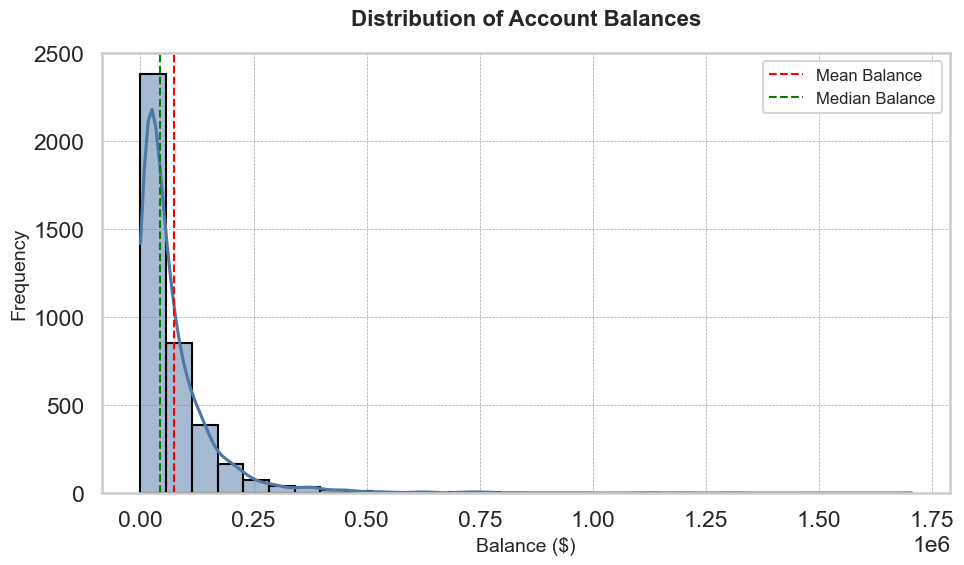

In [6]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))  
hist = sns.histplot(
    data['Balance'], 
    kde=True,  
    color="#4E79A7",  
    bins=30,  
    edgecolor="black" 
)

plt.title("Distribution of Account Balances", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Balance ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(data['Balance'].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean Balance')
plt.axvline(data['Balance'].median(), color='green', linestyle='--', linewidth=1.5, label='Median Balance')
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.grid(visible=True, which='major', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

## Observations

- The Balance feature is a right skewed distribution


In [7]:
data['Qual_miles'].value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
1678       1
2954       1
2273       1
739        1
1005       1
Name: count, Length: 164, dtype: int64

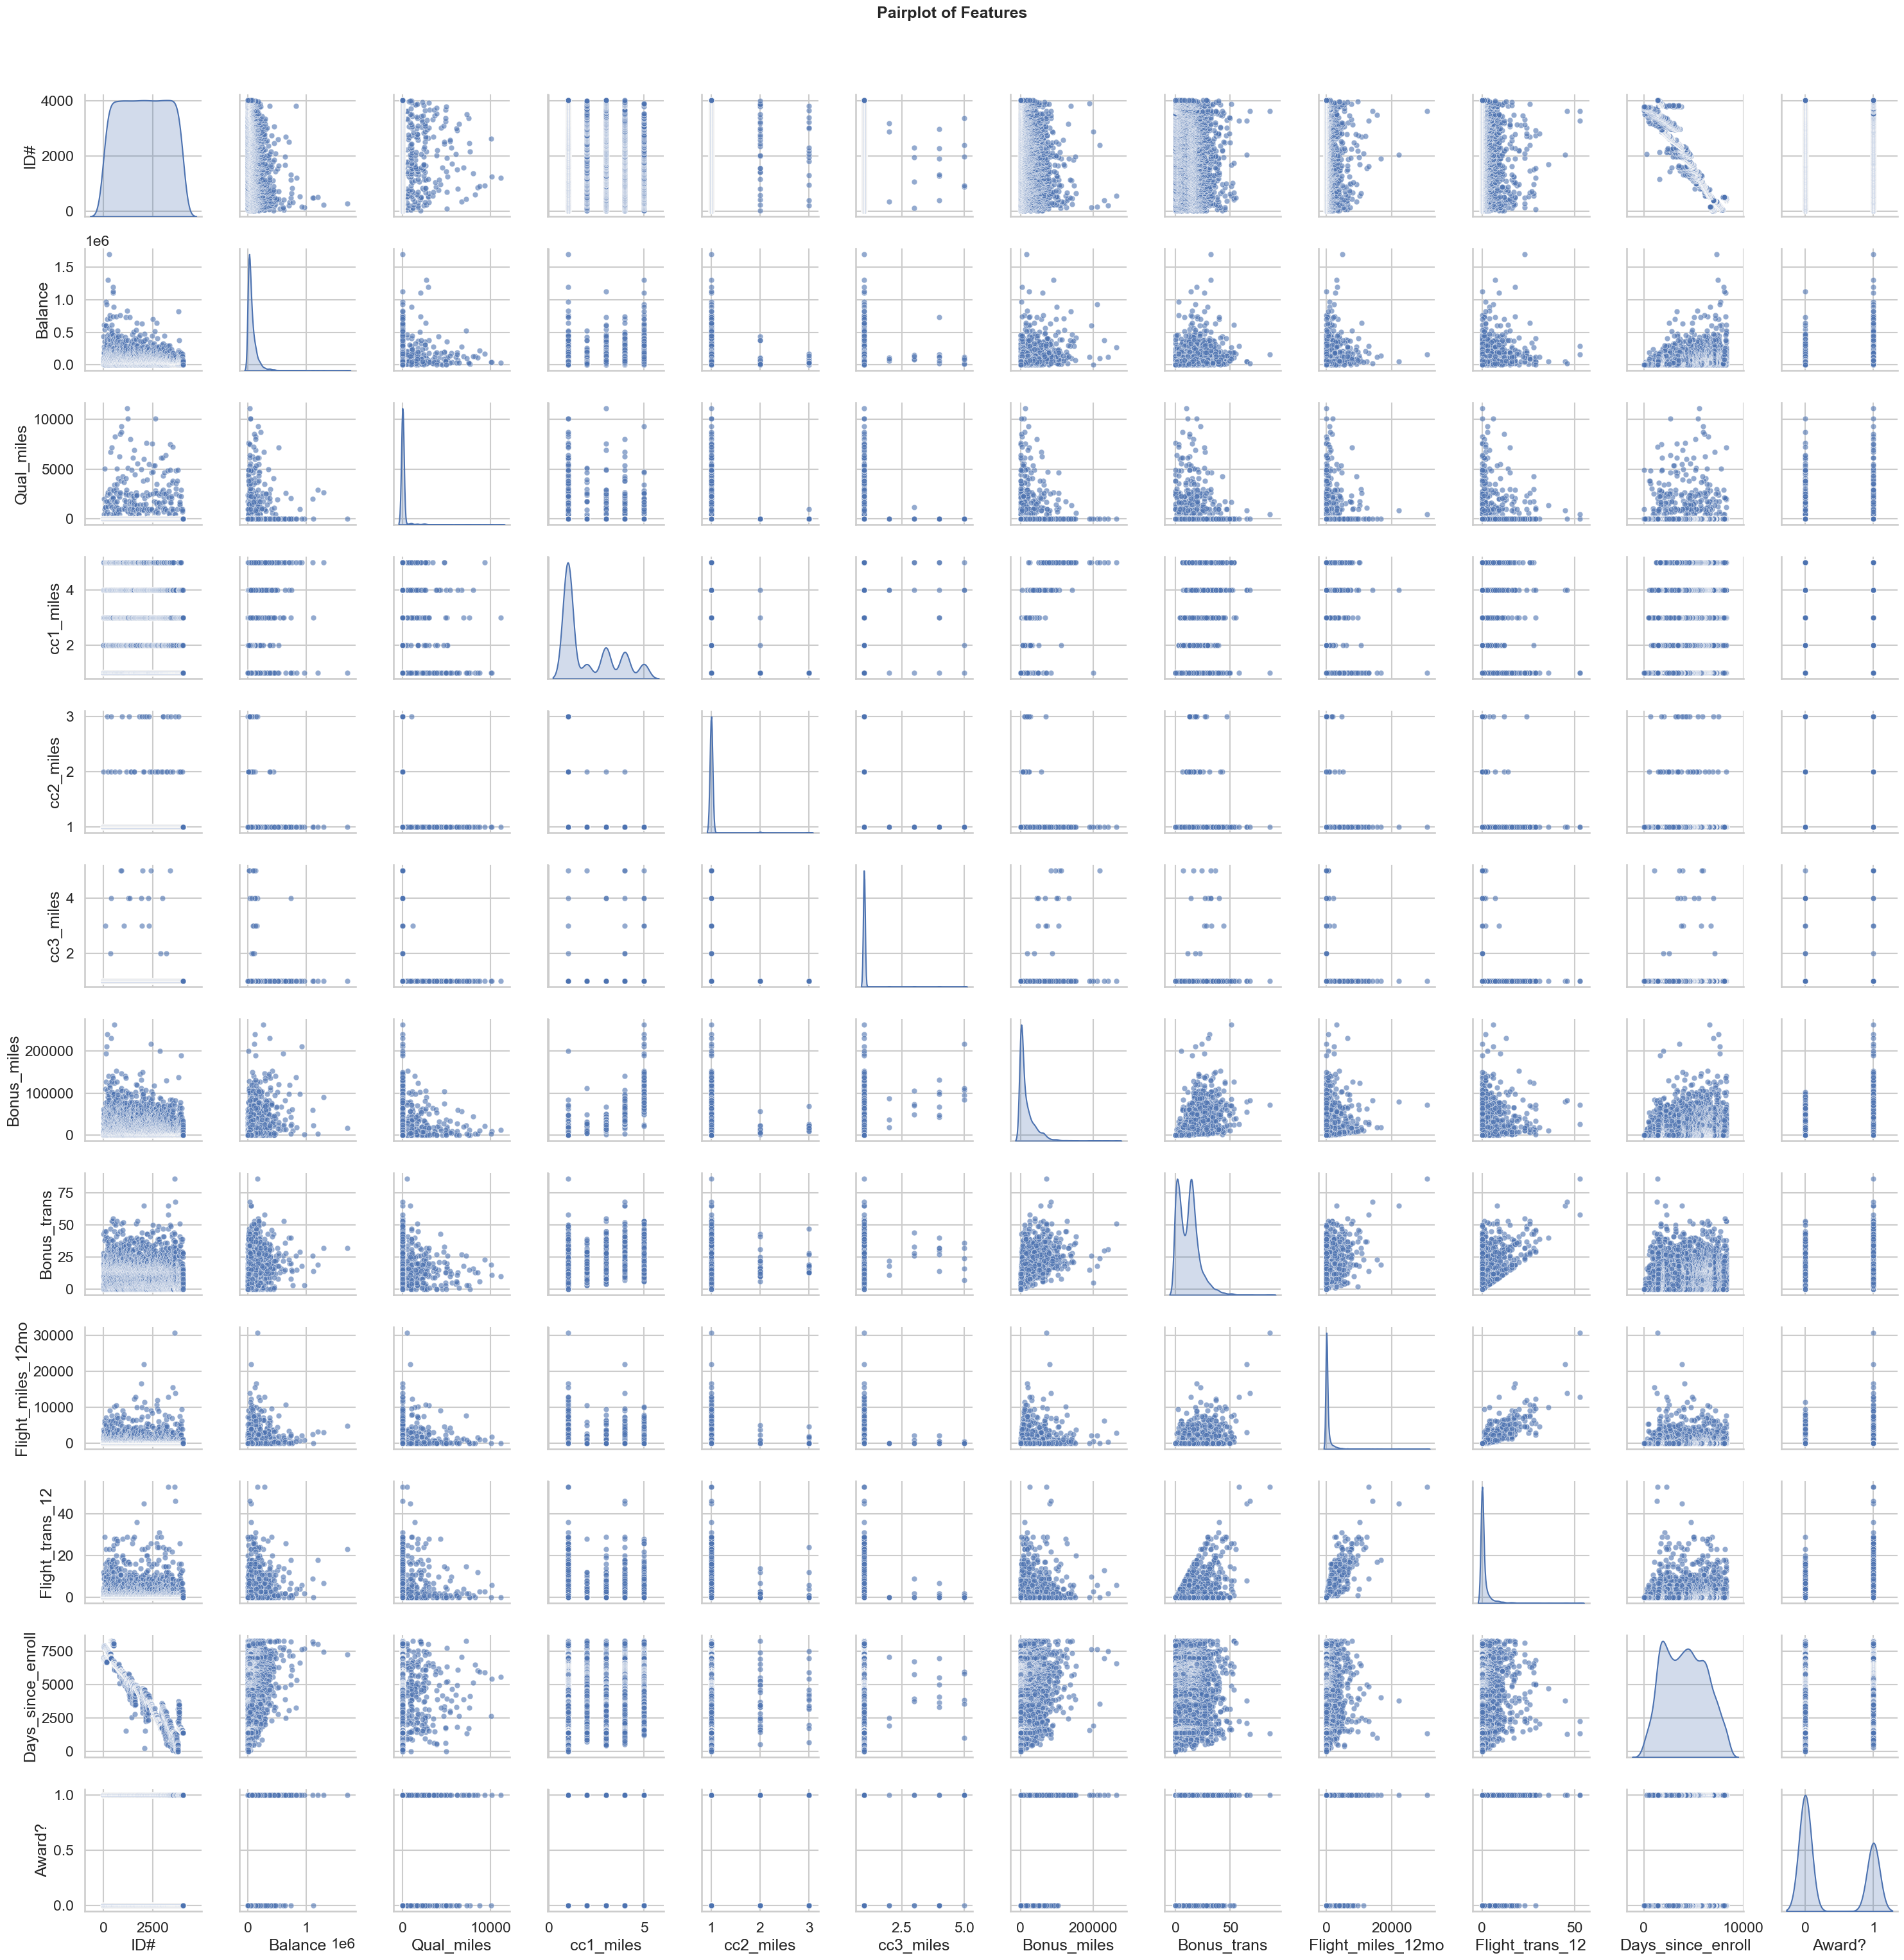

In [8]:
sns.set_theme(style="whitegrid", context="talk")
pairplot = sns.pairplot(
    data,  
    diag_kind="kde", 
    palette="Set2",  
    plot_kws={'alpha': 0.6, 's': 40},  
    diag_kws={'shade': True}  
)

pairplot.fig.suptitle(
    "Pairplot of Features",
    y=1.02,  
    fontsize=18,
    fontweight="bold"
)

pairplot.fig.tight_layout()
plt.show()

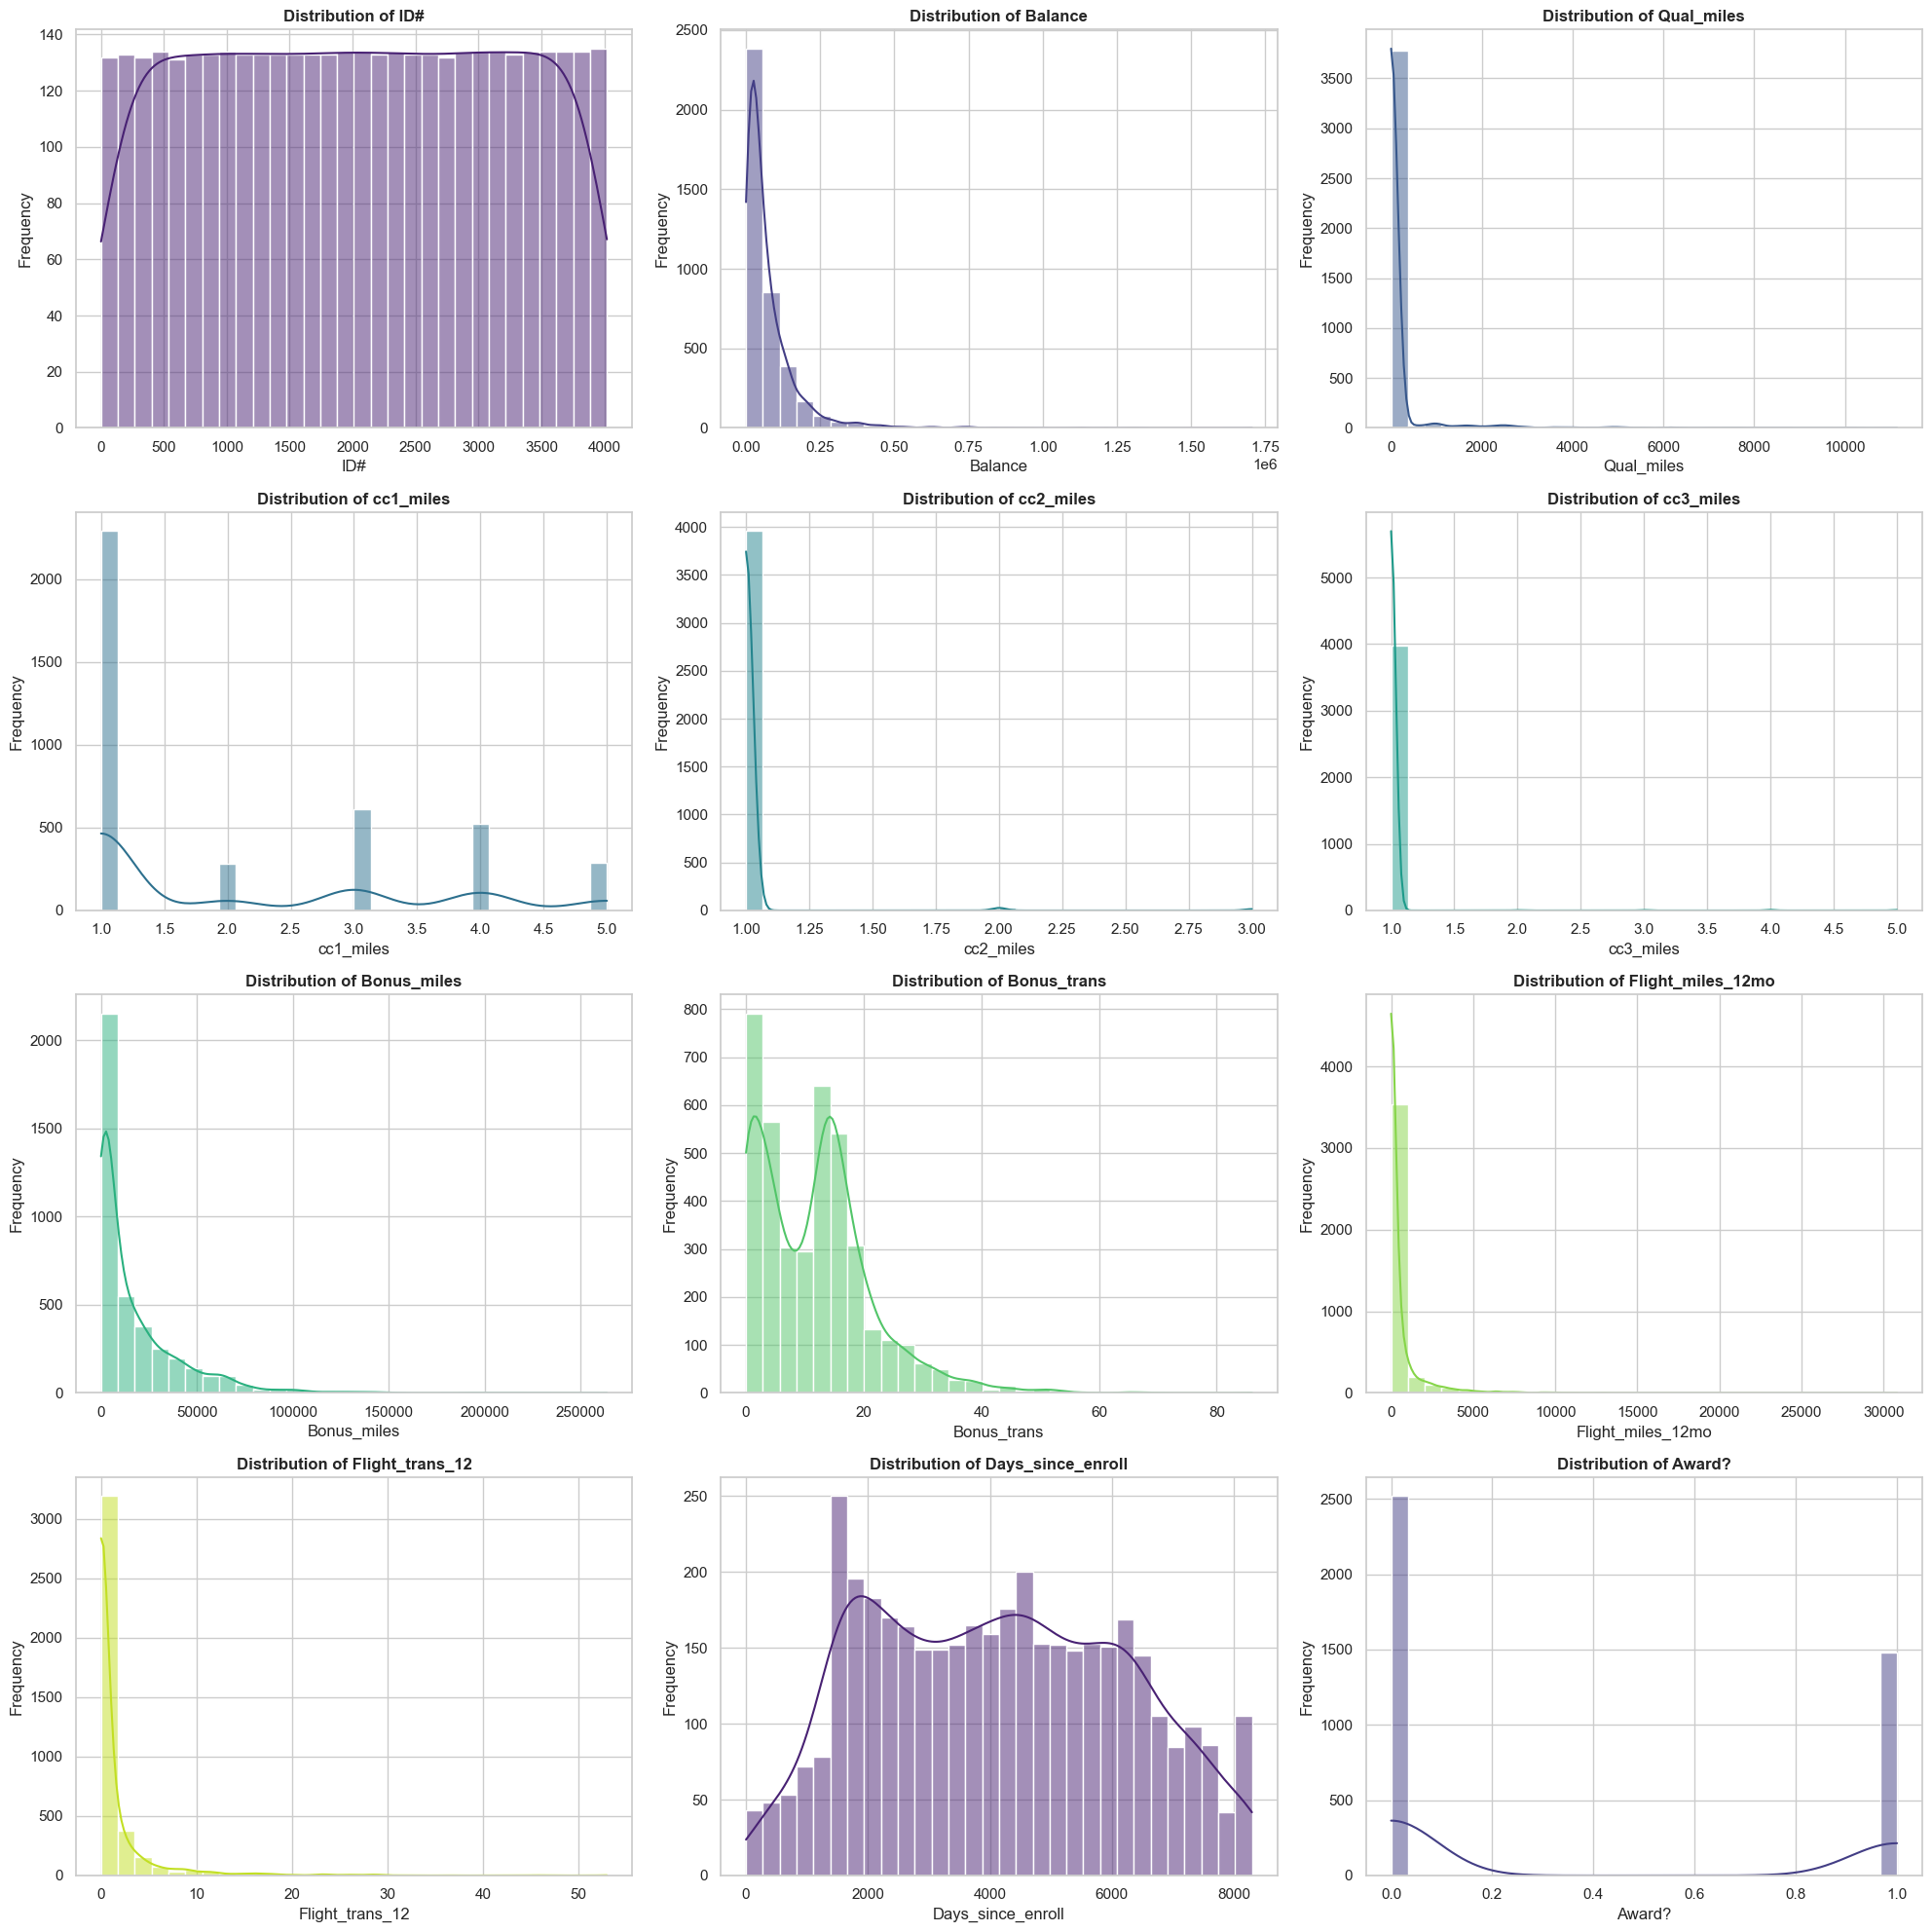

In [11]:
# Set style for plots
sns.set(style="whitegrid", palette="pastel")

# Initialize a figure for subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

# Updated loop for histograms
for idx, column in enumerate(data.columns):
    if idx < len(axes):
        # Select a random color from the color palette
        color = sns.color_palette("viridis", 10)[idx % 10]  # Use modulo to cycle through colors
        sns.histplot(data[column], bins=30, kde=True, ax=axes[idx], color=color)
        axes[idx].set_title(f'Distribution of {column}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Observations

- Most of the features are right skewed ,but one of them is binomial also

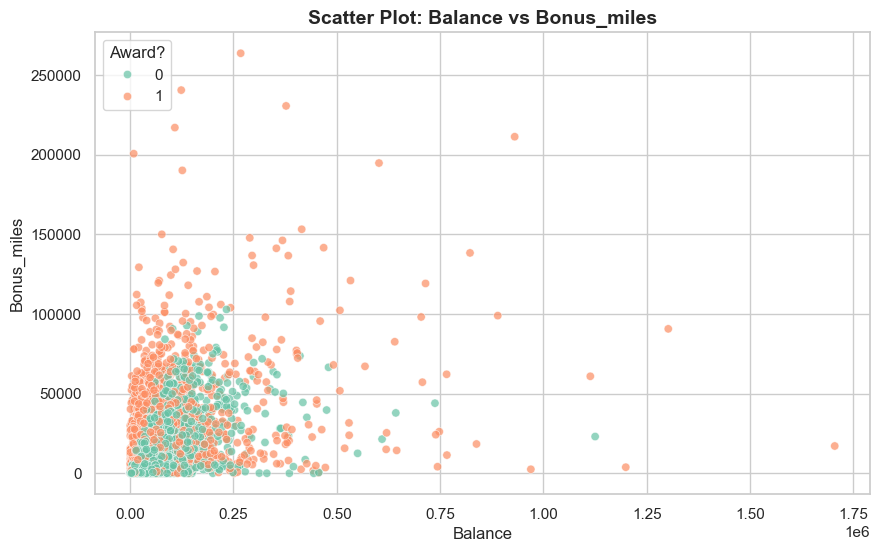

In [12]:
# Scatter plot for two variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Balance', y='Bonus_miles', hue='Award?', palette='Set2', alpha=0.7)
plt.title('Scatter Plot: Balance vs Bonus_miles', fontsize=14, fontweight='bold')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.legend(title='Award?', loc='upper left')
plt.grid(True)
plt.show()

## Obsevations

- Balance, Bonus_miles have some positive correlation

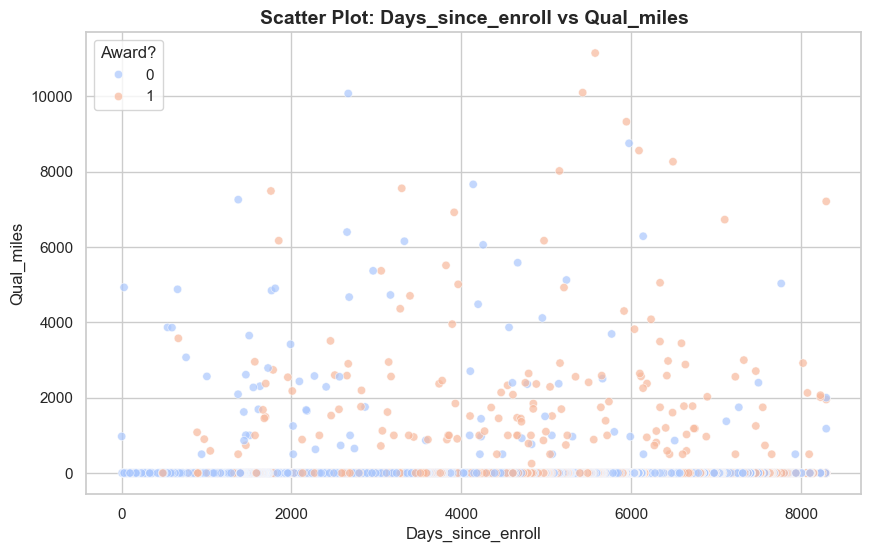

In [13]:
# Scatter plot for Days_since_enroll vs Qual_miles
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Days_since_enroll', y='Qual_miles', hue='Award?', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot: Days_since_enroll vs Qual_miles', fontsize=14, fontweight='bold')
plt.xlabel('Days_since_enroll')
plt.ylabel('Qual_miles')
plt.legend(title='Award?', loc='upper left')
plt.grid(True)
plt.show()

## Observations

- Days_since_enroll, Qual_miles for some values they are showing positive correlation

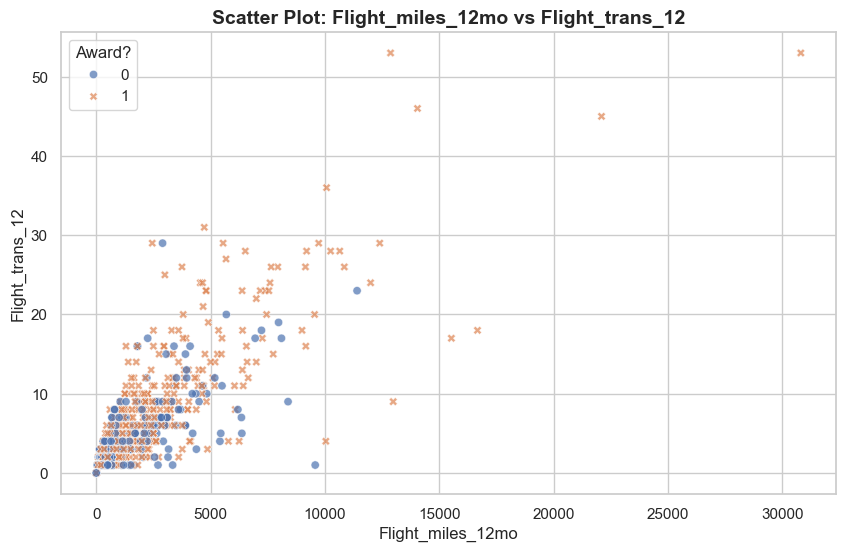

In [14]:
# Scatter plot for Flight_miles_12mo vs Flight_trans_12
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Flight_miles_12mo', y='Flight_trans_12', hue='Award?', style='Award?', palette='deep', alpha=0.7)
plt.title('Scatter Plot: Flight_miles_12mo vs Flight_trans_12', fontsize=14, fontweight='bold')
plt.xlabel('Flight_miles_12mo')
plt.ylabel('Flight_trans_12')
plt.legend(title='Award?', loc='upper left')
plt.grid(True)
plt.show()

- This too have a positive correlation

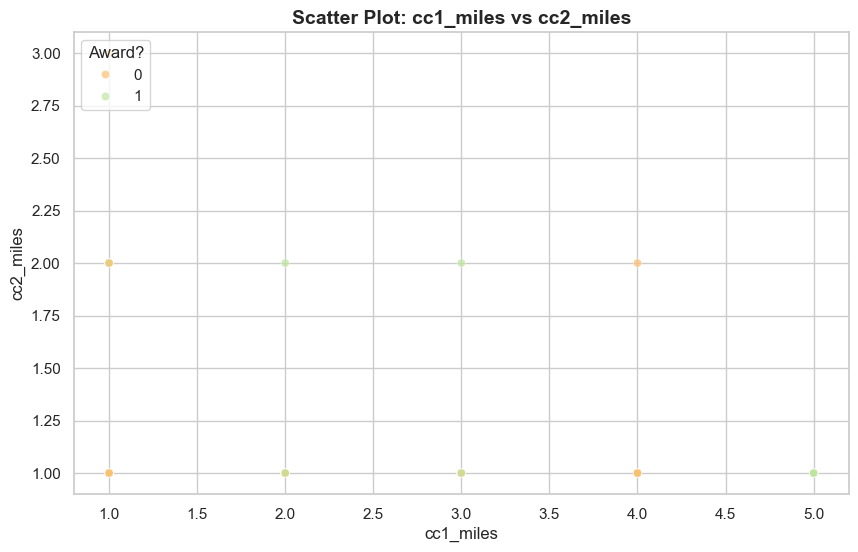

In [15]:
# Scatter plot for cc1_miles vs cc2_miles
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='cc1_miles', y='cc2_miles', hue='Award?', palette='Spectral', alpha=0.7)
plt.title('Scatter Plot: cc1_miles vs cc2_miles', fontsize=14, fontweight='bold')
plt.xlabel('cc1_miles')
plt.ylabel('cc2_miles')
plt.legend(title='Award?', loc='upper left')
plt.grid(True)
plt.show()

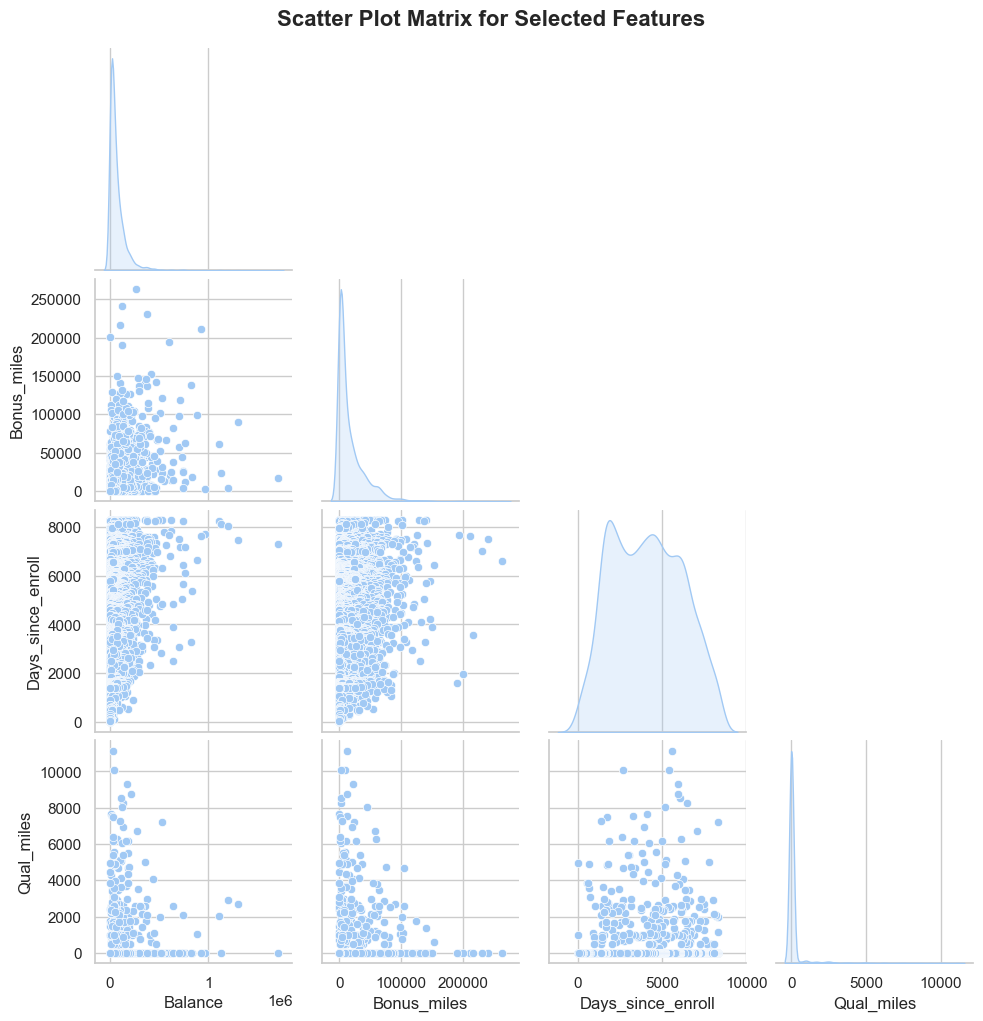

In [16]:
# Scatter plot matrix for selected features
selected_features = ['Balance', 'Bonus_miles', 'Days_since_enroll', 'Qual_miles']
sns.pairplot(data[selected_features], kind="scatter", diag_kind="kde", palette="husl", corner=True)
plt.suptitle('Scatter Plot Matrix for Selected Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

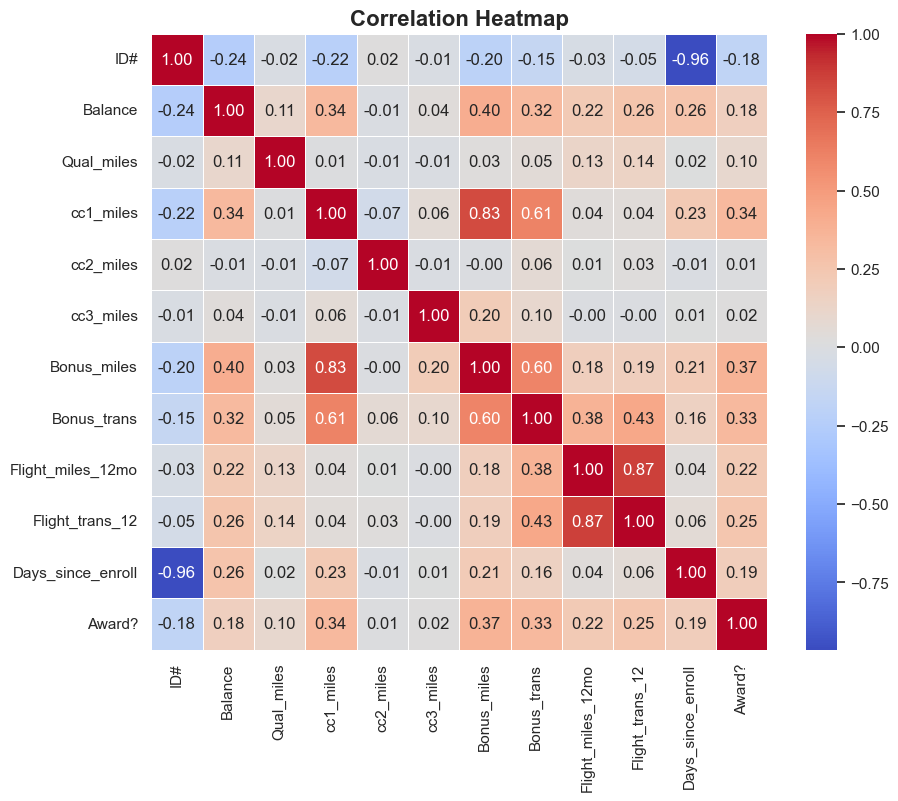

In [17]:
# Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True, 
    linewidths=0.5
)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()


- various features are highly correlated such as cc 1_miles and Bonus_miles, Fight_miles_12mo and Fight_trans_12

- Most of them are mildly correlated

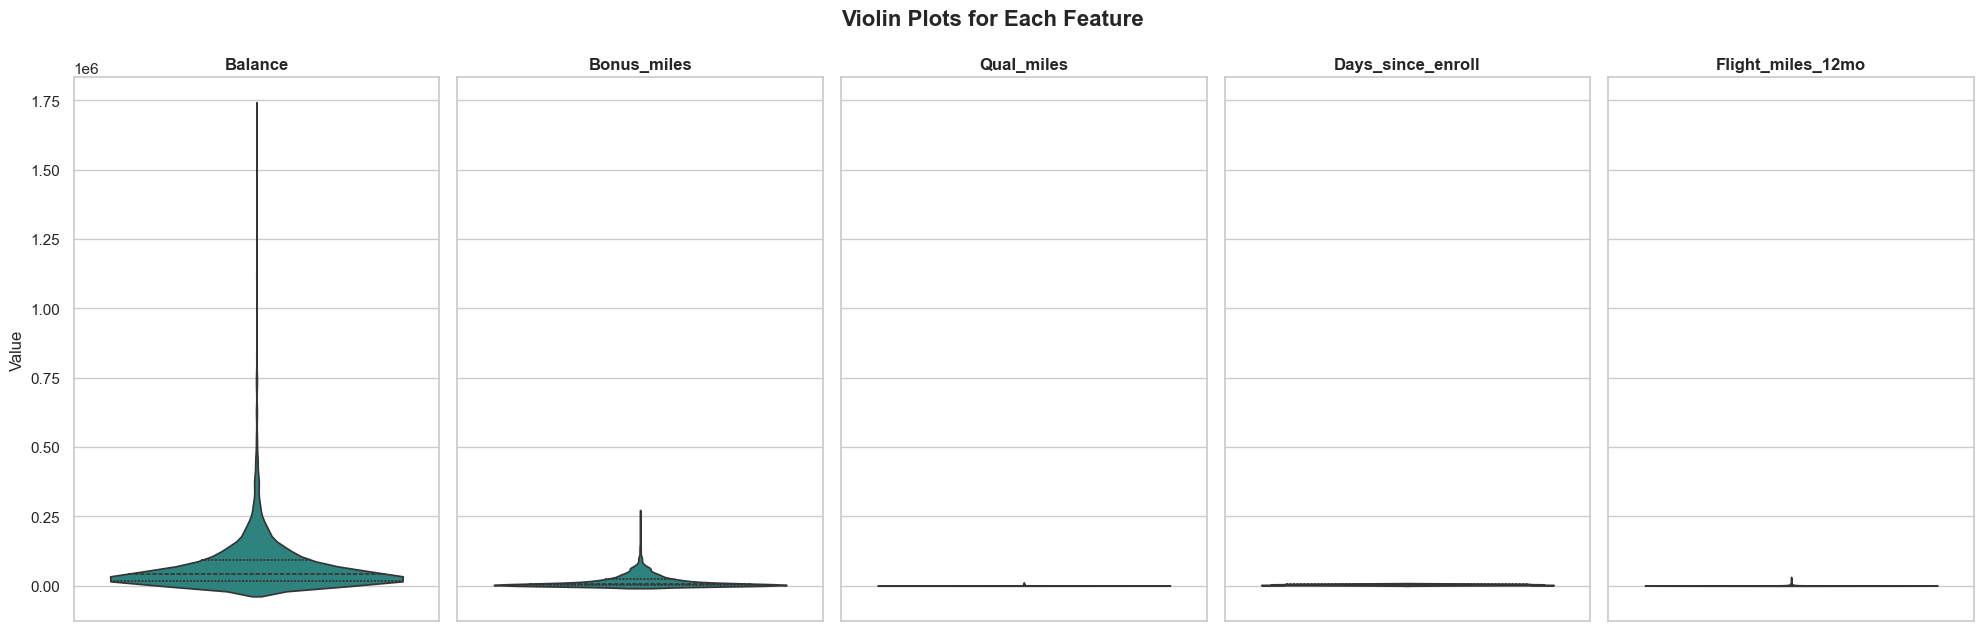

In [18]:
# Violin plots for each feature in subplots
features = ['Balance', 'Bonus_miles', 'Qual_miles', 'Days_since_enroll', 'Flight_miles_12mo']
n_features = len(features)

fig, axes = plt.subplots(nrows=1, ncols=n_features, figsize=(20, 6), sharey=True)

for i, feature in enumerate(features):
    sns.violinplot(
        y=feature, 
        data=data, 
        palette='viridis', 
        ax=axes[i], 
        inner='quartile'
    )
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value' if i == 0 else '')

# Adjust layout for professional appearance
plt.tight_layout()
plt.suptitle('Violin Plots for Each Feature', fontsize=16, fontweight='bold', y=1.05)
plt.show()

In [ ]:
np.arange(1.0, 2.0, 0.1) 